<a href="https://colab.research.google.com/github/Rizkyepk/Machine_Learning-Course/blob/main/week_6/SKLearn%20Clustering/8_Birch_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizky Eka Putra Kusnady

NIM : 1103204195

Kelas : Machine Learning (TK-44-G04)

Reproduce Birch Clustering

BIRCH without global clustering as the final step took 0.12 seconds
n_clusters : 83


<ipython-input-1-dddfdd367fa0>:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[mask, 0], X[mask, 1], c=col, edgecolor='k', marker=".", alpha=0.6)
<ipython-input-1-dddfdd367fa0>:50: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(this_centroid[0], this_centroid[1], marker="o", c=col, s=40)


BIRCH with global clustering as the final step took 0.10 seconds
n_clusters : 80


<ipython-input-1-dddfdd367fa0>:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[mask, 0], X[mask, 1], c=col, edgecolor='k', marker=".", alpha=0.6)


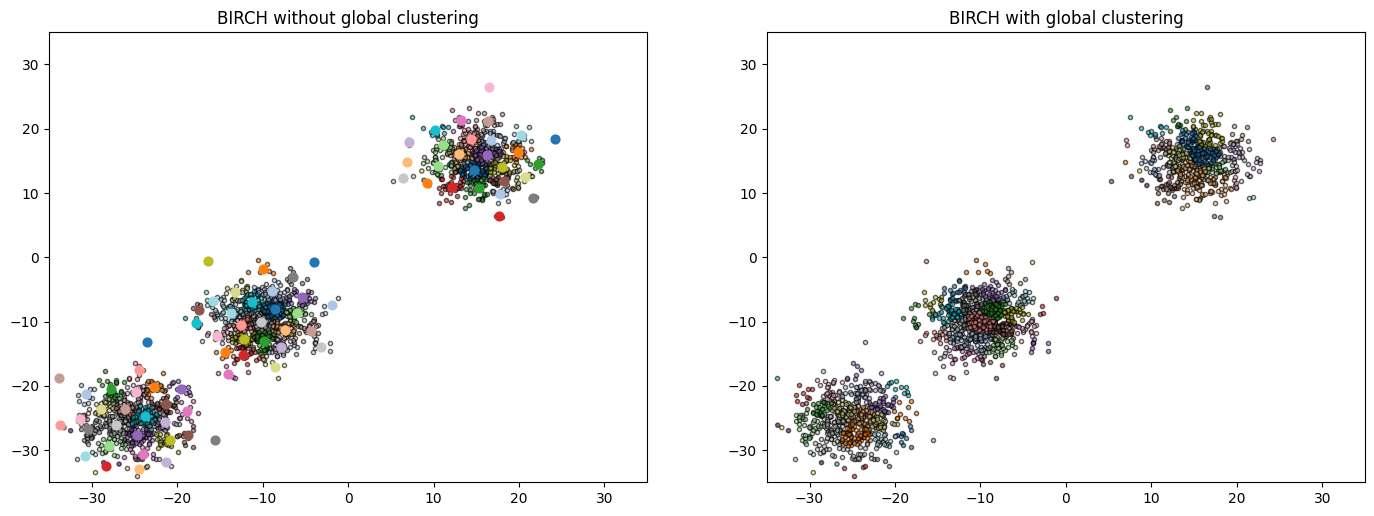

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from time import time
from sklearn.cluster import Birch

# Membuat center sehingga membuat grid sebesar 15x15
xx = np.linspace(-30, 30, 15)
yy = np.linspace(-30, 30, 15)
xx, yy = np.meshgrid(xx, yy)
n_centers = np.hstack((np.ravel(xx)[:, np.newaxis], np.ravel(yy)[:, np.newaxis]))

# Menggunakan warna acak untuk plot
colors_ = cycle(plt.cm.tab20.colors)

# Generate more data points for clustering
np.random.seed(42)
n_samples = 2000
X = np.random.randn(n_samples, 2) * 3
X[:600, :] += 15
X[600:1400, :] -= 10
X[1400:, :] -= 25

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(left=0.03, right=0.97, bottom=0.05, top=0.95)

# Menghitung cluster dengan BIRCH
birch_models = [
    Birch(threshold=1.5, n_clusters=None),
    Birch(threshold=1.5, n_clusters=80),
]
final_step = ["without global clustering", "with global clustering"]

for ind, (birch_model, info) in enumerate(zip(birch_models, final_step)):
    t = time()
    birch_model.fit(X)
    print("BIRCH %s as the final step took %0.2f seconds" % (info, (time() - t)))

    # Hasil Plot
    labels = birch_model.labels_
    centroids = birch_model.subcluster_centers_
    n_clusters = np.unique(labels).size
    print("n_clusters : %d" % n_clusters)

    ax = fig.add_subplot(1, 2, ind + 1)
    for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
        mask = labels == k
        ax.scatter(X[mask, 0], X[mask, 1], c=col, edgecolor='k', marker=".", alpha=0.6)
        if birch_model.n_clusters is None:
            ax.scatter(this_centroid[0], this_centroid[1], marker="o", c=col, s=40)
    ax.set_ylim([-35, 35])
    ax.set_xlim([-35, 35])
    ax.set_autoscaley_on(False)
    ax.set_title("BIRCH %s" % info)

plt.show()